# import + functions

In [33]:
import os
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# # load in the shuffled data - extract number of sequenes found
# PP_PATH =  r"Z:\projects\sequence_squad\revision_data\emmett_revisions\circular_shuffle\synthetic_data\shuffled\ppseq_output\\"
# shuffle_events_per_min = []
# for iteration_ in tqdm(range(len(os.listdir(PP_PATH)))):
#     file = os.listdir(PP_PATH)[iteration_]
#     data_path = os.path.join(PP_PATH,file)+ r'//_final_analysis_output//'
#     clust_events_per_min = 0
#     all_chunks_len = 0
#     current_mir = file.split('run')[0][:-1]
#     for file in os.listdir(data_path):
#         if 'chunk' in file:
#             current_data_path = os.path.join(data_path,file)+ r'//'
#             replay_clusts = pd.read_csv(current_data_path + 'filtered_replay_clusters_df.csv')
#             if 'ordering_classification' in list(replay_clusts):
#                 interval_length = int(file.split('_')[-1].split('to')[-1]) - int(file.split('_')[-1].split('to')[0])
#                 # only sequential events
#                 clust_events_per_min += len(replay_clusts[replay_clusts.ordering_classification == 'sequential'])
#                 all_chunks_len += interval_length/60
#             else:
#                 print('no ordering classification...')
            
#     if all_chunks_len > 0:
#         shuffle_events_per_min += [clust_events_per_min/all_chunks_len]


# # load in the non shuffle - extract number of sequuences found 
# PP_PATH =  r"Z:\projects\sequence_squad\revision_data\emmett_revisions\circular_shuffle\synthetic_data\non_shuffled\ppseq_output\\"
# non_shuff_events_per_min = []
# for iteration_ in tqdm(range(len(os.listdir(PP_PATH)))):
#     file = os.listdir(PP_PATH)[iteration_]
#     data_path = os.path.join(PP_PATH,file)+ r'//_final_analysis_output//'
#     clust_events_per_min = 0
#     all_chunks_len = 0
#     current_mir = file.split('run')[0][:-1]
#     for file in os.listdir(data_path):
#         if 'chunk' in file:
#             current_data_path = os.path.join(data_path,file)+ r'//'
#             replay_clusts = pd.read_csv(current_data_path + 'filtered_replay_clusters_df.csv')
#             if 'ordering_classification' in list(replay_clusts):
#                 interval_length = int(file.split('_')[-1].split('to')[-1]) - int(file.split('_')[-1].split('to')[0])
#                 # only sequential events
#                 clust_events_per_min += len(replay_clusts[replay_clusts.ordering_classification == 'sequential'])
#                 all_chunks_len += interval_length/60
#             else:
#                 print('no ordering classification...')

#     if all_chunks_len > 0:
#         non_shuff_events_per_min += [clust_events_per_min/all_chunks_len]
        
# outpath = r'Z:\projects\sequence_squad\revision_data\emmett_revisions\circular_shuffle\\'
# pd.DataFrame({'id':mirs,'c_shuffled_epm':shuffle_events_per_min,'non_shuffled_epm':non_shuff_events_per_min}).to_csv(outpath+ 'circular_shuffle_test.csv')


  0%|          | 0/13 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:07<00:00,  1.72it/s]


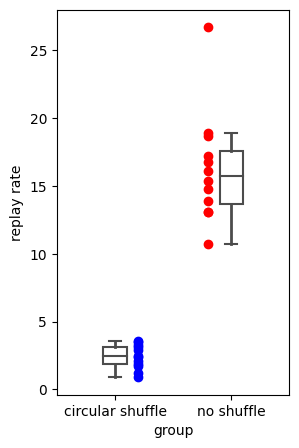

In [ ]:
# load in the csv:
circular_shuffle_df = pd.read_csv(r'Z:\projects\sequence_squad\revision_data\emmett_revisions\circular_shuffle\circular_shuffle_test.csv')

shuffle_events_per_min = circular_shuffle_df.c_shuffled_epm.values
non_shuff_events_per_min = circular_shuffle_df.non_shuffled_epm.values

fig, ax = plt.subplots(1, 1, figsize=(3, 5))

ax.plot([0.2]*len(shuffle_events_per_min),shuffle_events_per_min,'o', color = 'blue')
ax.plot([0.8]*len(non_shuff_events_per_min),non_shuff_events_per_min,'o', color = 'red')

plt_df = pd.DataFrame({'group': (['circular shuffle'] * len(shuffle_events_per_min)) + (['no shuffle'] * len(non_shuff_events_per_min)) , 'replay rate': list(shuffle_events_per_min)+list(non_shuff_events_per_min)})
ax = sns.boxplot(y='replay rate', x='group', data=plt_df, color='blue', width=.2, zorder=10,
                    showcaps=True, boxprops={'facecolor': 'none', "zorder": 10},
                    showfliers=False, whiskerprops={'linewidth': 2, "zorder": 10},
                    saturation=1, orient='v')